# Team Bear: Qarik Coorporate Project
### Some exploratory data analysis and data visualization

The project consists on performing an analysis on the World Bank loan documentation, during the period 1990 - 2020. Since the data set is highly unstructured, extracting relevant features of each loan has been our main concern so far.

This notebook is concerned only with a single feature associated to each loan document: the countries involved in the loan.

In [1]:
#We first import some relevant packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Our first data visualization will consist on a histogram showing in how many different loan documents a country is **mentioned**. And it does not show how many loan documents have been given to a country.

For example, we will see the US is mentioned in 3121 of 3205 loan documents, but this is mostly due to the fact that the World Bank has its HQ in the US.

We would also like to record that out of the 3205 documents, we not able to extract a single country mentioned on only 5 documents. However, there are known instances cases were the program does not extract the most 'relevant' country out of the documents. For example, Ivory Coast and Cote d'Ivoire are two names from the same country, but our program can only identify the first one.

In [2]:
#We import the relevant data
raw_country_count_df = pd.read_csv('freq_countries_mentioned.csv')
raw_country_count_df.rename(columns = {'Unnamed: 0': 'countries'}, inplace = True)
raw_country_count_df.head()

,countries,num_doc_mentioned
0,united states,3121
1,china,326
2,india,218
3,indonesia,213
4,brazil,154


In [3]:
raw_country_count_df.shape

(227, 2)

We will now plot a bar-like graph showing the frequency of the countries mentioned. But as we can see from the graph above, the US is mentioned an order of magnitud more than the second most mentioned country.

Hence, in order to make our graphs more meaninful we will exclude the US from the following visualizations.

[]

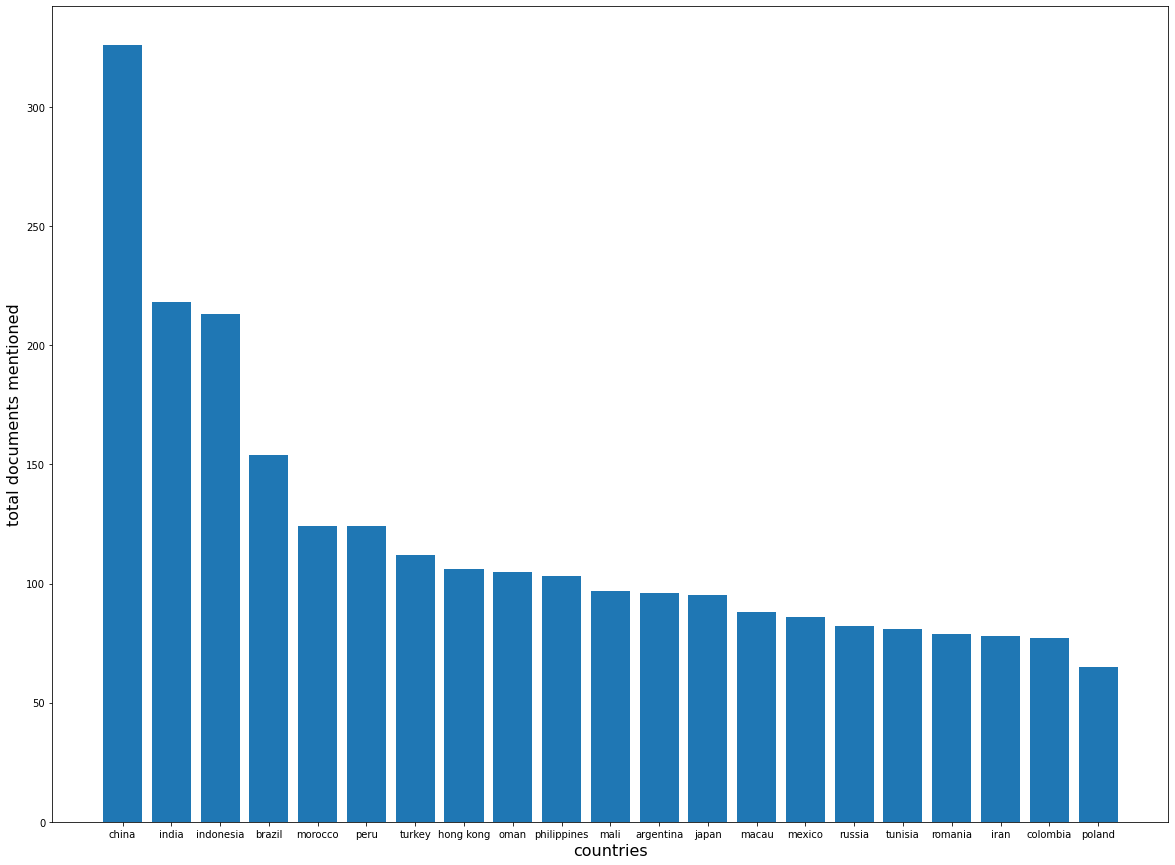

In [4]:
#We plot the 20 most mentioned countries, excluding the US.

plt.figure(figsize = (20,15))

plt.bar(raw_country_count_df.loc[1:21, 'countries'].values, 
        raw_country_count_df.loc[1:21, 'num_doc_mentioned'].values)

plt.xlabel('countries', fontsize = 16)
plt.ylabel('total documents mentioned', fontsize = 16)

plt.plot()

In [5]:
countries_not_mentioned_df = raw_country_count_df[raw_country_count_df.num_doc_mentioned == 0]

In [6]:
countries_not_mentioned_df.shape

(64, 2)

This shows that from the 227 countries considered, 64 (~ 30% of all countries) were never mentioned in any loan documents.

We will now perform a similar analysis as the one done above with a sligtly different data set. The data set still coinsists of country names and integers associated to them. However, this time the number associated to the country is the number of times this country was the one mentioned the most in the document (which is our best approximation to assigning a single country to each loan document).

In [7]:
max_country_count_df = pd.read_csv('max_countries_mentioned.csv')
max_country_count_df.rename(columns = {'Unnamed: 0': 'countries'}, inplace = True)
max_country_count_df.head()

,countries,num_doc_max
0,china,318
1,indonesia,205
2,india,197
3,united states,149
4,brazil,142


As we can see, the US appears as the most mentioned country in 149 documents. We should not regard this as saying that the US has taken 149 loans, but rather, that our method failed to extract the 'true country' associated to the loan in this occations.

We use the following two facts to justify this claim:
- The World Bank has its HQ in the US. Furthermore, we already saw that the US was mentioned at least once in the large mayority of the documents.
- According to [Wikipedia](https://en.wikipedia.org/wiki/World_Bank) the World Bank "is an international financial institution that provides loans and grants to the governments of low- and middle-income countries for the purpose of pursuing capital projects". And the US clearly does not fit this description.

[]

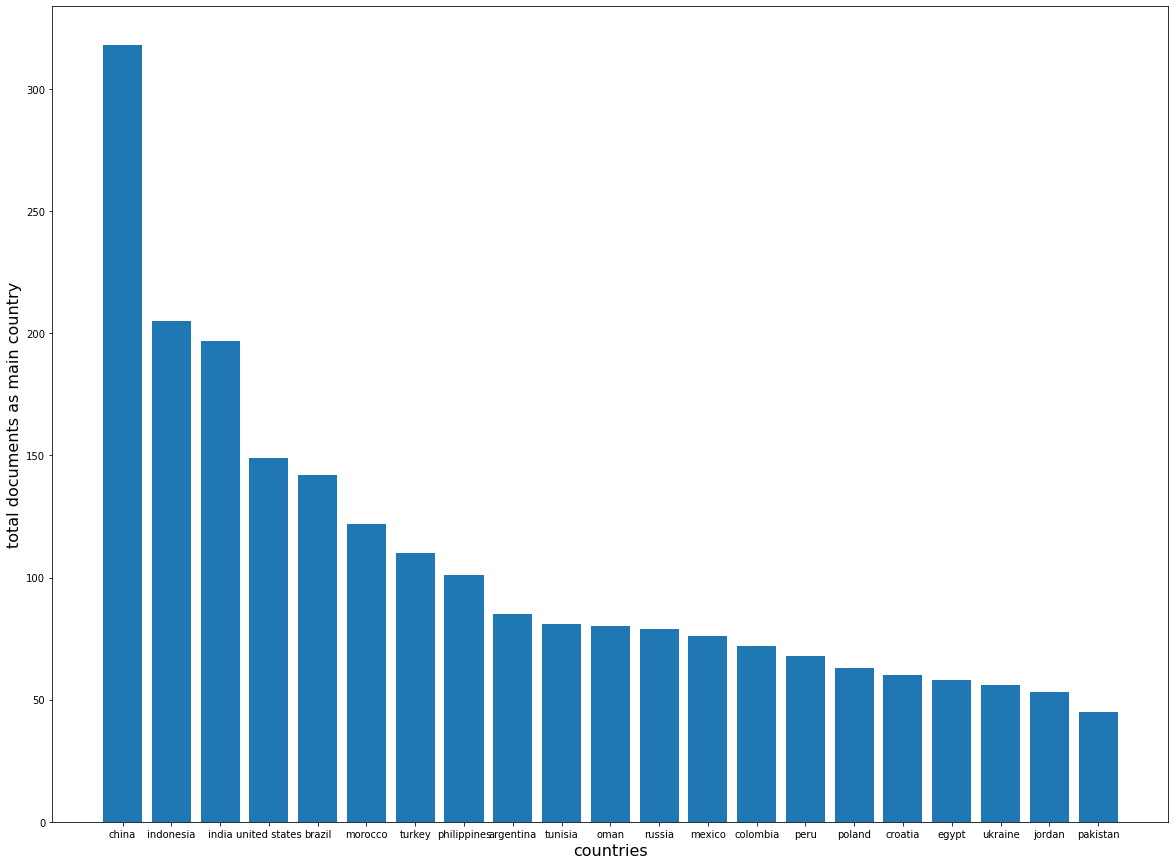

In [8]:
#We plot the 20 most mentioned countries, excluding the US.

plt.figure(figsize = (20,15))

plt.bar(max_country_count_df.loc[0:20, 'countries'].values, 
        max_country_count_df.loc[0:20, 'num_doc_max'].values)

plt.xlabel('countries', fontsize = 16)
plt.ylabel('total documents as main country', fontsize = 16)

plt.plot()

In [9]:
countries_not_max_df = max_country_count_df[max_country_count_df.num_doc_max == 0]
countries_not_max_df.shape

(119, 2)